# Descriptive Statistics

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')
%matplotlib inline

Let's get some data

In [314]:
path_to_titanic = '..\\datasets\\titanic\\titanic.csv'
path_to_diabetes = '..\\datasets\\diabetes.csv'
titanic = pd.DataFrame.from_csv(path=path_to_titanic, index_col=None)
diabetes = pd.DataFrame.from_csv(path=path_to_diabetes, index_col=None)

to_fill_na = ['Cholesterol','hdl','ratio','height','weight','waist','hip']
for var in to_fill_na:
    diabetes[var].fillna(diabetes[var].median(), inplace=True)
    
diabetes['frame'].fillna(value='medium', inplace=True)

diabetes['height'] = 2.54*diabetes['height']
diabetes['weight'] = 0.454*diabetes['weight']

titanic['sibsp'] = titanic['sibsp'].fillna(1).astype(int)

#Droping columns
titanic.drop(['ticket','boat','body','home.dest'], axis=1, inplace=True)
#Droping rows
titanic.drop([1309], axis=0, inplace=True)

In [383]:
diabetes.shape

(403, 16)

In [382]:
diabetes.head()

,id,Cholesterol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,46,female,157.48,54.934,medium,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,29,female,162.56,98.972,large,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,58,female,154.94,116.224,large,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,67,male,170.18,54.026,large,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,64,male,172.72,83.082,medium,138.0,80.0,44.0,41.0,300.0


In [384]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0.0,211.3375,B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1,2.0,151.5500,C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1,2.0,151.5500,C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2.0,151.5500,C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2.0,151.5500,C22 C26,S


## Types of data 

### Numerical variables: 1. Continuous, 2. Discrete

* Continuous: Data that can take on any value in an interval.
* Discrete: Data that can only take on integer values, such as counts.

In [315]:
diabetes['height'].head(10)

0    157.48
1    162.56
2    154.94
3    170.18
4    172.72
5    180.34
6    175.26
7    149.86
8    175.26
9    160.02
Name: height, dtype: float64

In [316]:
titanic['sibsp'].head(10)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    0
8    2
9    0
Name: sibsp, dtype: int32

### Categorical variables: 
* Nominal (categorical): data that can only take on a specific set of values.

* Binary: a special case of categorical with just two categories (0/1, True, False). (dichotomous, logical, indicator)

* Ordinal: Categorical data that has an explicit ordering.

In [317]:
titanic['sex'].head(10)

0    female
1      male
2    female
3      male
4    female
5      male
6    female
7      male
8    female
9      male
Name: sex, dtype: object

In [318]:
titanic['survived'].head(10)

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
7    0.0
8    1.0
9    0.0
Name: survived, dtype: float64

In [319]:
diabetes['frame'].head(10)

0    medium
1     large
2     large
3     large
4    medium
5     large
6    medium
7    medium
8     large
9     small
Name: frame, dtype: object

## Univariate Descriptive Analysis

### Numerical descriptive Statistics: Central tendency

In [320]:
diabetes.shape

(403, 16)

In [389]:
diabetes['hdl'].mean()

50.43424317617866

In [321]:
print "Mean: {}".format(diabetes['height'].mean())
print "Median: {}".format(diabetes['height'].median())
print "Mode: {}".format(stats.mode(diabetes['height']))

Mean: 167.690421836
Median: 167.64
Mode: ModeResult(mode=array([ 160.02]), count=array([43]))


### Numerical descriptive Statistics: Percentiles, min and max

In [322]:
percentiles = np.arange(5, 100, 5)
scores = stats.scoreatpercentile(diabetes['height'], per = percentiles)
print "Min: {}".format(diabetes['height'].min())
print "Max: {}".format(diabetes['height'].max())
print "==== Percentiles ==="
for (per, score) in zip(percentiles, scores):
    print "{}% of the values are below {}".format(per, score)

Min: 132.08
Max: 193.04
==== Percentiles ===
5% of the values are below 152.4
10% of the values are below 154.94
15% of the values are below 157.48
20% of the values are below 160.02
25% of the values are below 160.02
30% of the values are below 162.56
35% of the values are below 162.56
40% of the values are below 165.1
45% of the values are below 165.1
50% of the values are below 167.64
55% of the values are below 167.64
60% of the values are below 170.18
65% of the values are below 172.72
70% of the values are below 172.72
75% of the values are below 175.26
80% of the values are below 175.26
85% of the values are below 177.8
90% of the values are below 180.34
95% of the values are below 182.88


### Numerical descriptive Statistics: Dispersion

In [323]:
print "Standard Deviation: {}".format(diabetes['height'].std())
print "Range: {}".format(diabetes['height'].max() - diabetes['height'].min())
print "Inter-Quartile Range: {}".format(np.diff(stats.scoreatpercentile(diabetes['height'], per=np.array([0.25,0.75]))))

Standard Deviation: 9.89093874334
Range: 60.96
Inter-Quartile Range: [ 7.6073]


#### Interpreting dispersion: What can you say about the following results?

In [381]:
print 'Standard Deviation by Frame:'
diabetes.groupby('frame')['hdl'].aggregate(np.std)

Standard Deviation by Frame:


frame
large     13.364674
medium    17.980442
small     17.654109
Name: hdl, dtype: float64

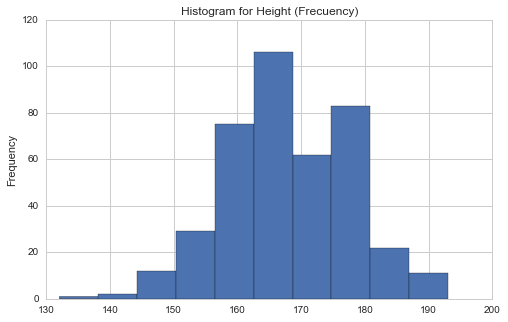

In [324]:
fig, ax = plt.subplots(figsize=(8,5))
diabetes['height'].plot(kind='hist', title="Histogram for Height (Frecuency)", ax=ax);

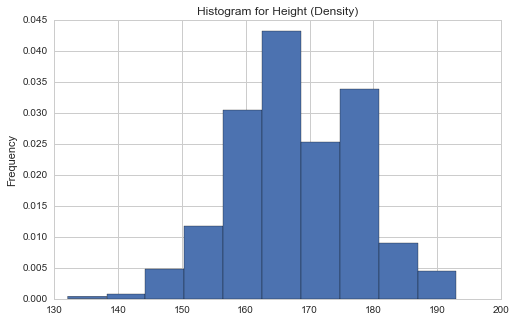

In [325]:
fig, ax = plt.subplots(figsize=(8,5))
diabetes['height'].plot(kind='hist', title="Histogram for Height (Density)", normed=1, ax=ax);

## Describing Discrete Data

In [327]:
print "Mean: {}".format(titanic['sibsp'].mean())
print "Mode: {}".format(stats.mode(titanic['sibsp']))

Mean: 0.498854087089
Mode: ModeResult(mode=array([0]), count=array([891]))


In [328]:
titanic['sibsp'].value_counts().sort_index()

0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: sibsp, dtype: int64

In [329]:
sibsp_value_counts = titanic['sibsp'].value_counts().sort_index()
for i, x in zip(sibsp_value_counts.index, sibsp_value_counts):
    print "{}: {:0.2f}%".format(i, 100*x/1309.0)

0: 68.07%
1: 24.37%
2: 3.21%
3: 1.53%
4: 1.68%
5: 0.46%
8: 0.69%


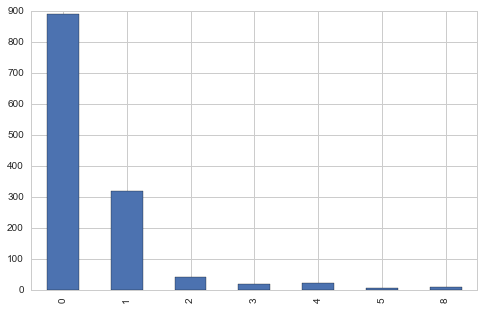

In [330]:
fig, ax = plt.subplots(figsize=(8,5))
sibsp_value_counts.plot(kind='bar', xticks=range(9), ax=ax)

## Categorical Data

In [331]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [332]:
sex_value_counts = titanic['sex'].value_counts()
for i, x in zip(sex_value_counts.index, sex_value_counts):
    print "{}: {:0.2f}%".format(i, 100*x/1309.0)

male: 64.40%
female: 35.60%


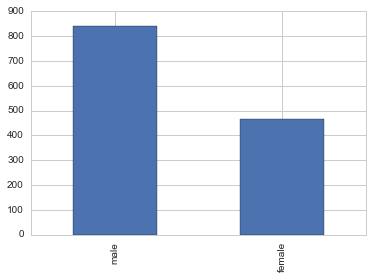

In [333]:
titanic['sex'].value_counts().plot(kind='bar')

## Bivariate Descriptive Statistics

### Two numerical variables

In [334]:
np.corrcoef(diabetes["hdl"].values, diabetes["Cholesterol"].values)[0,1]

0.18661919017153542

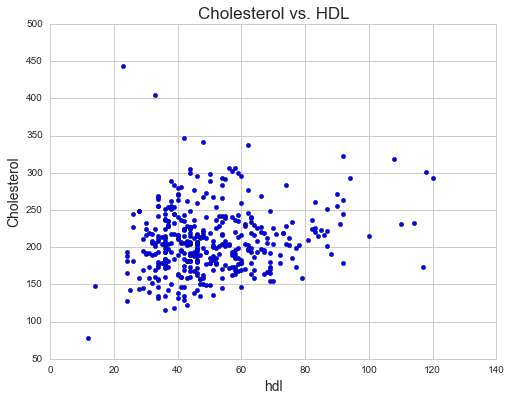

In [390]:
# Y = Cholesterol; X = hdl
# 1.1 Traditional scatter plot with matplotlib
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(diabetes["hdl"], diabetes["Cholesterol"])
ax.set_title("Cholesterol vs. HDL", size = 17)
ax.set_xlabel("hdl", size = 14)
ax.set_ylabel("Cholesterol", size = 14)
plt.show()

### One Categorical vs. a Numerical Variable

In [336]:
diabetes.groupby('frame')['hdl'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
frame,,,,,,,,
large,103.0,44.601942,13.364674,12.0,36.00,43.0,52.00,81.0
medium,196.0,50.836735,17.980442,14.0,38.75,46.5,59.00,120.0
small,104.0,55.451923,17.654109,28.0,42.75,51.5,65.25,110.0


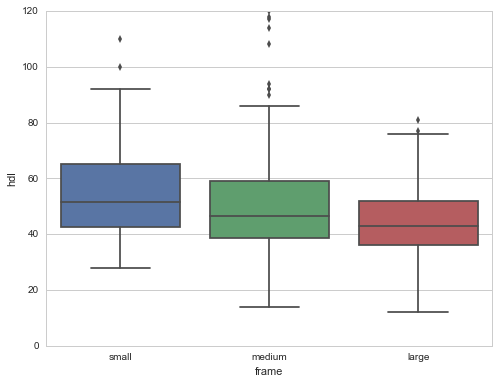

In [337]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = "frame", y = "hdl", data = diabetes, order = ["small","medium","large"], ax=ax);

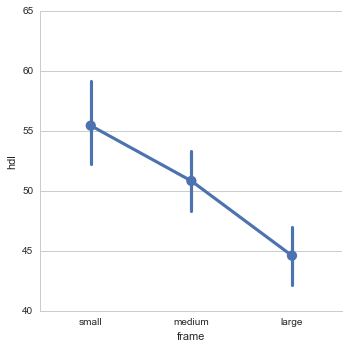

In [391]:
sns.factorplot(x = "frame", y = "hdl", data = diabetes, kind="point", size = 5, order = ["small","medium","large"]);

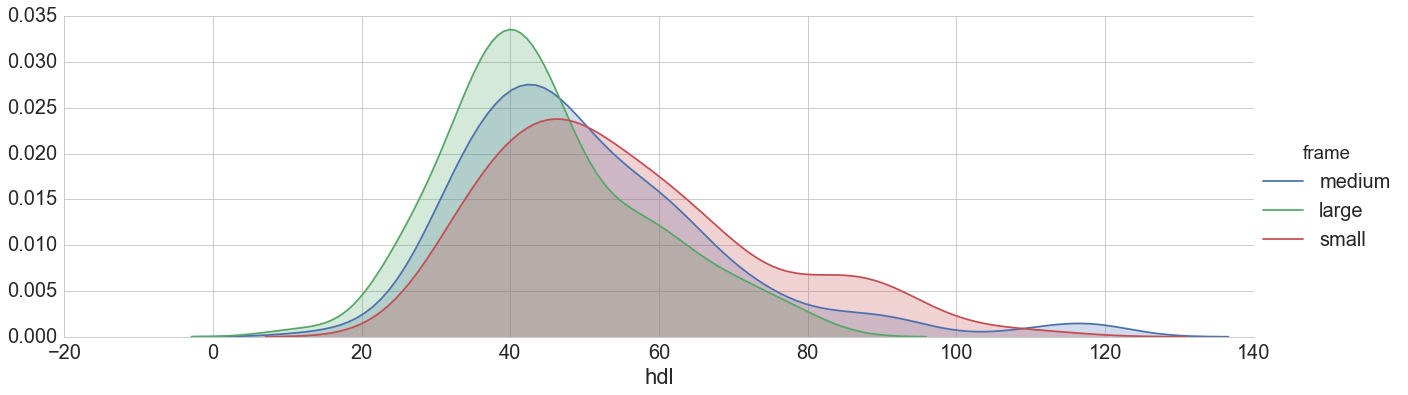

In [339]:
# Comparison of distributions
sns.set_context('notebook', font_scale=2)
fig = sns.FacetGrid(diabetes, hue = "frame", aspect = 3, size = 6)
fig.map(sns.kdeplot, "hdl", shade = True)
fig.add_legend();

### Two categorical variables

In [340]:
diabetes.groupby(['gender','frame']).count()['id'].unstack()

frame,large,medium,small
gender,,,
female,42,123,69
male,61,73,35


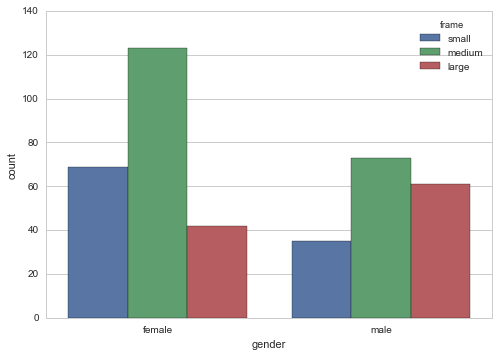

In [341]:
sns.set_context('notebook', font_scale=1)
sns.countplot(x = "gender", hue = "frame", data = diabetes, hue_order = ["small","medium","large"]);

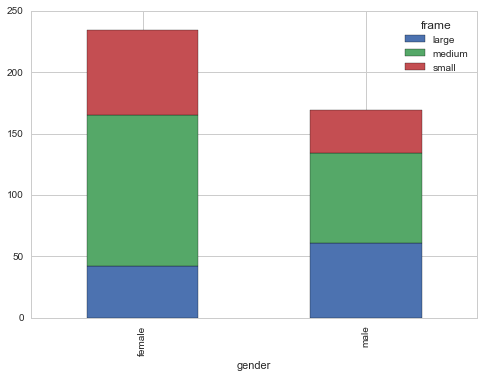

In [342]:
diabetes.groupby(['gender','frame']).count()['id'].unstack().plot(kind = "bar", stacked = True);

# Inferencial Statistics

## Population vs. Sample

Technically a sample is any subset from the population. In practice is a set of data collected and/or selected from a statistical population by a **defined procedure**. The elements of a sample are known as sample points, sampling units or observations.

Why to why need to work with samples samples?

Typically, the population is very large, making a census or a complete enumeration of all the values in the population is either impractical or impossible.

A good sampling procedure extracts a sample that reflects the main characteristics of the **population**.

In [343]:
n_samples = 10
n = 25 # Sample size
samples = np.zeros((n, n_samples))
for i in range(10):
    samples[:,i] = np.random.choice(male_pop_iq, size=n)

###  Why samples are different from each other?

In [344]:
samples = pd.DataFrame(samples, columns=['sample_' + str(i+1) for i in range(10)], index=np.arange(25)+1)

In [345]:
samples

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10
1,99.2,110.2,62.7,109.7,97.2,105.0,75.0,124.3,82.3,121.7
2,113.5,108.7,87.8,98.6,96.4,90.7,105.0,93.9,78.5,77.7
3,114.6,102.0,102.9,116.4,95.7,86.0,57.1,91.7,111.5,116.1
4,121.5,107.1,69.4,87.0,90.3,82.5,97.9,114.3,104.8,101.6
5,95.7,84.7,131.6,122.3,80.8,118.1,100.4,89.6,128.3,112.1
6,120.6,105.9,112.1,110.6,106.4,95.7,118.8,110.0,74.6,86.3
7,99.5,100.7,105.2,79.7,112.6,91.2,68.0,100.8,89.9,79.5
8,111.7,96.7,108.6,73.8,86.8,73.5,107.6,79.5,111.4,72.8
9,90.5,88.8,110.1,84.7,112.8,101.8,99.4,100.2,96.0,110.9
10,117.0,88.5,83.3,77.1,127.3,92.3,121.9,110.4,126.4,130.3


In [346]:
samples.describe()

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,104.772000,100.432000,101.412000,103.616000,101.848000,100.052000,98.484000,104.244000,99.912000,98.248000
std,14.508145,15.316976,15.867769,17.383102,14.118048,14.927746,17.221345,14.292046,14.644462,16.109007
min,68.500000,68.600000,62.700000,73.800000,73.900000,73.500000,57.100000,79.500000,74.600000,72.800000
25%,95.000000,88.800000,89.800000,94.800000,95.400000,91.000000,89.100000,93.300000,89.500000,86.000000
50%,107.100000,101.400000,104.000000,100.100000,97.500000,96.900000,101.700000,106.200000,97.700000,98.200000
75%,114.600000,108.400000,108.700000,110.600000,112.600000,109.200000,111.200000,114.300000,111.400000,110.900000
max,124.500000,135.000000,131.600000,140.300000,128.200000,138.100000,126.100000,126.300000,128.300000,130.300000


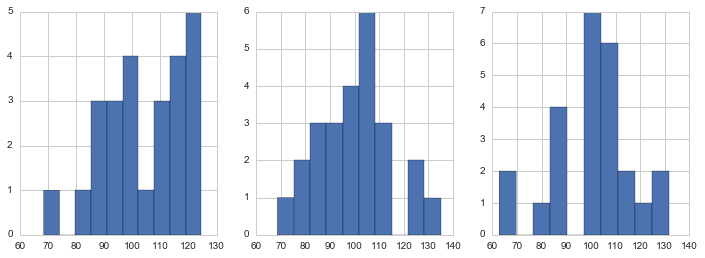

In [347]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12,4))
ax[0].hist(samples['sample_1'], bins=10)
ax[1].hist(samples['sample_2'], bins=10)
ax[2].hist(samples['sample_3'], bins=10);

In [348]:
male_pop_iq = pd.Series(male_pop_iq)

In [349]:
male_pop_iq.describe()

count    1000000.000000
mean         100.011187
std           14.993122
min           24.400000
25%           89.900000
50%          100.000000
75%          110.100000
max          169.200000
dtype: float64

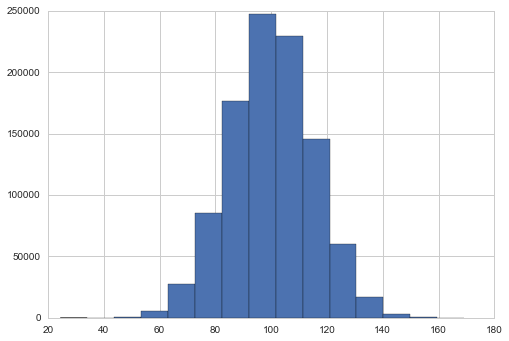

In [350]:
male_pop_iq.hist(bins=15);

# Some useful concepts of Probability Theory

## Distribution
> the way in which values are distributed out among groups or spread over an interval.

### Random Variable
> a variable whose value is subject to variations due to chance (i.e. randomness, in a mathematical sense). A random variable can take on a set of possible different values (similarly to other mathematical variables), each with an associated probability [wiki](https://en.wikipedia.org/wiki/Random_variable)

**Types**

1. Discrete Random Variables <br>
    Eg: Genders of the buyers buying shoe
2. Continuous Random Variables <br>
    Eg: Shoe Sales in a quarter
    
### Probability Distribution
> Assigns a probability to each measurable subset of the possible outcomes of a random experiment, survey, or procedure of statistical inference. [wiki](https://en.wikipedia.org/wiki/Probability_distribution)

#### Probability Mass Function
probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value

#### Probability Density Function
A probability density function (PDF), or density of a continuous random variable, is a function that describes the relative likelihood for this random variable to take on a given value.

## Some models commonly used in Statistical Modeling
#### Continuous
* Normal
* Exponential
* Uniform
* Chi-square
* Gamma
* Beta

#### Discrete
* Bernoulli
* Binomial
* Discrete uniform
* Poisson

## Statistical Inference

We have one sample form the population of male iq. We would like to say something about the population.

Assumptions: 
1. The Population of interest is Normaly Distributed.

The goal now is to estimate the parameters of the population using the sample.

### Point estimations

In [392]:
samples['sample_1']

1      99.2
2     113.5
3     114.6
4     121.5
5      95.7
6     120.6
7      99.5
8     111.7
9      90.5
10    117.0
11    122.3
12     90.7
13    101.1
14    112.9
15    114.1
16    112.5
17     89.2
18    124.5
19     92.1
20    107.1
21     68.5
22     98.2
23     95.0
24    123.9
25     83.4
Name: sample_1, dtype: float64

In [351]:
samples['sample_1'].head()

1     99.2
2    113.5
3    114.6
4    121.5
5     95.7
Name: sample_1, dtype: float64

In [352]:
# Point estimates
sample1_mean = samples['sample_1'].mean()
print sample1_mean
print samples['sample_1'].std()

104.772
14.5081448389


### Confidence Interval
Interval estimates can be contrasted with point estimates. A point estimate is a single value given as the estimate of a population parameter that is of interest, for example the mean of some quantity. An interval estimate specifies instead a range within which the parameter is estimated to lie. A confidence interval has a level of "confidence" associated with the estimation.

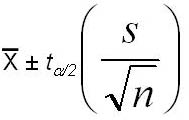

In [353]:
from IPython.display import Image
Image("img/ci-for-mean.JPG")

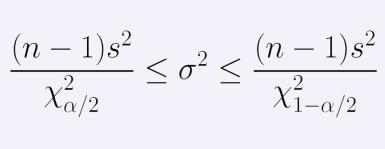

In [354]:
Image("img/confidencevariance.jpg")

In [355]:
# Confidence interval for the mean
stats.norm.interval(0.95, loc=samples['sample_1'].mean(), scale=samples['sample_1'].std()/np.sqrt(25))

(99.08491172665083, 110.45908827334918)

In [356]:
chi_values = stats.chi2.interval(df=24, alpha=0.975)

In [357]:
sd_sample1 = samples['sample_1'].std()
low_sd, high_sd = (24*sd_sample1**2/chi_values[1], 24*sd_sample1**2/chi_values[0])
(np.sqrt(low_sd), np.sqrt(high_sd))

(10.951042620234929, 21.236217557448892)

In [358]:
# Model the population using your estimates
pop_model = stats.norm(loc=sample1_mean, scale=sd_sample1)

Now we can use models to make statements about the population

In [359]:
values = np.arange(80,125,10)
print "According to our model:"
for x in values:
    print "{}% of the male population have iq score less than {}".format(100*np.round(pop_model.cdf(x),2), x)

Acording to our model:
4.0% of the male population have iq score less than 80
15.0% of the male population have iq score less than 90
37.0% of the male population have iq score less than 100
64.0% of the male population have iq score less than 110
85.0% of the male population have iq score less than 120


In [360]:
# In this case we know the population
print "Real population statements:"
for x in values:
    print "{}% of the male population have iq score less than {}".format(stats.percentileofscore(male_pop_iq,x), x)

Real population statements:
9.1048% of the male population have iq score less than 80
25.26285% of the male population have iq score less than 90
49.96605% of the male population have iq score less than 100
74.70445% of the male population have iq score less than 110
90.8909% of the male population have iq score less than 120


# Hypothesis Testing


We would like to know if the effects we see in the sample(observed data) are likely to occur in the population. 

The way classical hypothesis testing works is by conducting a statistical test to answer the following question:
> Given the sample and an effect, what is the probability of seeing that effect just by chance?

Here are the steps on how we would do this

1. Define your hypothesis
2. Choose the appropiate statistical test
3. Compute test statistic and p-value
4. Interpret the result

If p-value is very low(most often than now, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too. 

This process is very similar to the *proof by contradiction* paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(<0.05 as a rule of thumb), we reject the null hypothesis. 

### Question: Do male and female are equally smart (measured by iq scores)?

In [361]:
male_pop_iq = np.round(np.random.normal(loc=100, scale=15, size=int(1e+6)),1)
female_pop_iq = np.round(np.random.normal(loc=100, scale=15, size=int(1e+6)),1)

In [362]:
female_sample = np.random.choice(female_pop_iq, size = 35)
male_sample = np.random.choice(male_pop_iq, size = 35)

In [363]:
iq_data = pd.DataFrame(columns=['iq_score','gender'], index=range(70))
iq_data['gender'] = pd.Series(['female']*35 + ['male']*35, index=range(70))
iq_data['iq_score'].ix[:34] = female_sample
iq_data['iq_score'].ix[35:] = male_sample
iq_data['iq_score'] = iq_data['iq_score'].astype(np.float)

In [364]:
iq_data.groupby('gender').agg([np.mean, np.std])

iq_score           
             mean        std
gender                      
female  96.917143  15.709729
male    97.888571  12.098414

Looks like males have a higher iq than females (in the sample). Can we say the same about the population?

### 1. Define your hypothesis

#### Null Hypothesis: There is no difference in the population's average intelligence of males and females. $\mu1 = \mu2$
#### Alternative Hypothesis: There is a difference in the population's average intelligence of males and females (one gender is on average smater than the other)

### 2. Choose the appropiate statistical test

** t Test for equallity of means with a significance level of 0.05** (5% risk of concluding that a difference exists when there is no actual difference)

Asumptions: Both population are normally distributed with equal variance.

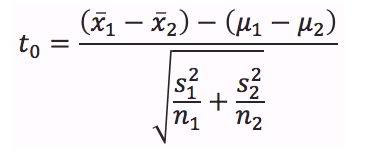

In [365]:
Image("img\\ttest.png")

### 3. Make the calculations

In [366]:
mean_male, sd_male = iq_data['iq_score'].loc[iq_data['gender']=='male'].mean(), iq_data['iq_score'].loc[iq_data['gender']=='male'].std()
mean_female, sd_female = iq_data['iq_score'].loc[iq_data['gender']=='female'].mean(), iq_data['iq_score'].loc[iq_data['gender']=='female'].std()
numerator = mean_male - mean_female - (0) #(mu1-mu2)
denom = np.sqrt(sd_male**2/35.0 + sd_female**2/35.0)
hypothesis_statistic = numerator/denom
print hypothesis_statistic

0.289838617495


In [367]:
stats.ttest_ind(iq_data['iq_score'].loc[iq_data['gender']=='male'].values,
                iq_data['iq_score'].loc[iq_data['gender']=='female'].values,
                equal_var=True)

Ttest_indResult(statistic=0.28983861749543421, pvalue=0.772821668530697)

### 4. Interpret the result:

#### Since the p-value is greater than 0.05 we conclude that: the difference observed in the sample means are due to random samplign. There is evidence to suppose that the mean intelligence is different between males and females.

## Chi-square tests

Chi-Square tests are used when the data are frequencies, rather than numerical score/price.

The following two tests make use of chi-square statistic

1. chi-square test for goodness of fit
2. chi-square test for independence

Chi-square test is a non-parametric test. They do not require assumptions about population parameters and they do not test hypotheses about population parameters.

### Using the diabetes dataset
### Question: Does the frame size is related with the gender?

1. Define your hypothesis
2. Choose the appropiate statistical test
3. Compute test statistic and p-value
4. Interpret the result

### Chi-square for independence

In [368]:
diabetes.groupby(['frame','gender'])['id'].count().unstack()

gender,female,male
frame,,
large,42,61
medium,123,73
small,69,35


In [369]:
table = diabetes.groupby(['frame','gender'])['id'].count().unstack().values

In [370]:
chi_results = stats.chi2_contingency(table)

In [371]:
print "Chi-Squared Statistic (Hypothesis statistic) {:0.3f}".format(chi_results[0])
print "p-value: {:0.5f}".format(chi_results[1])

Chi-Squared Statistic (Hypothesis statistic) 17.343
p-value: 0.00017


### Expected Values under the hypothesis of no difference

In [372]:
chi_results[3]

array([[  59.80645161,   43.19354839],
       [ 113.80645161,   82.19354839],
       [  60.38709677,   43.61290323]])